## Introduction
#### This dataset is all about COVID19 data, It contains province and region wise spread for covid in Belgium(Europe), condition of patient , which life support system they are on, how are they diagnosed, test of covid 19 with detail description about patient, place and type of vaccine provided to them.

source - https://epistat.sciensano.be/COVID19BE_codebook.pdf


In [1]:
# importing required libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Age sex data

In [2]:
# reading the data with appropriate encoding.
df_age_sex = pd.read_csv('../input/covid19-belgium/CASES_AGESEX.csv', encoding='ISO-8859-1' ,parse_dates=True)
df_age_sex

,DATE,PROVINCE,REGION,AGEGROUP,SEX,CASES
0,2020-03-01,Antwerpen,Flanders,40-49,M,1
1,2020-03-01,Brussels,Brussels,10-19,F,1
2,2020-03-01,Brussels,Brussels,10-19,M,1
3,2020-03-01,Brussels,Brussels,20-29,M,1
4,2020-03-01,Brussels,Brussels,30-39,F,1
...,...,...,...,...,...,...
168151,2022-06-09,Limburg,Flanders,50-59,F,1
168152,2022-06-09,Limburg,Flanders,60-69,M,1
168153,2022-06-09,OostVlaanderen,Flanders,70-79,F,1
168154,2022-06-09,VlaamsBrabant,Flanders,0-9,F,1


In [3]:
df_age_sex.duplicated().sum() #checking duplicate data

0

In [4]:
df_age_sex.info() # showing its data type

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 168156 entries, 0 to 168155
Data columns (total 6 columns):
 #   Column    Non-Null Count   Dtype 
---  ------    --------------   ----- 
 0   DATE      168156 non-null  object
 1   PROVINCE  156346 non-null  object
 2   REGION    156346 non-null  object
 3   AGEGROUP  161140 non-null  object
 4   SEX       163677 non-null  object
 5   CASES     168156 non-null  int64 
dtypes: int64(1), object(5)
memory usage: 7.7+ MB


In [5]:
## date data type is not reading correctly so we have to correct it .

#### Except for date other data type is correct


In [6]:
df_age_sex['DATE'] = pd.to_datetime(df_age_sex['DATE'])
df_age_sex.info() #correcting its data type

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 168156 entries, 0 to 168155
Data columns (total 6 columns):
 #   Column    Non-Null Count   Dtype         
---  ------    --------------   -----         
 0   DATE      168156 non-null  datetime64[ns]
 1   PROVINCE  156346 non-null  object        
 2   REGION    156346 non-null  object        
 3   AGEGROUP  161140 non-null  object        
 4   SEX       163677 non-null  object        
 5   CASES     168156 non-null  int64         
dtypes: datetime64[ns](1), int64(1), object(4)
memory usage: 7.7+ MB


In [7]:
df_age_sex.shape

(168156, 6)

In [8]:
df_age_sex.isnull().sum() #checking null values

DATE            0
PROVINCE    11810
REGION      11810
AGEGROUP     7016
SEX          4479
CASES           0
dtype: int64

In [9]:
df_age_sex['PROVINCE'].unique() # identifying unique province  

array(['Antwerpen', 'Brussels', 'Limburg', 'Liège', 'OostVlaanderen',
       'VlaamsBrabant', 'BrabantWallon', 'WestVlaanderen', 'Hainaut',
       'Namur', nan, 'Luxembourg'], dtype=object)

In [10]:
df_age_sex['PROVINCE'].value_counts() # identifying how many unique province  

Antwerpen         16128
Brussels          16056
OostVlaanderen    15146
Hainaut           15068
WestVlaanderen    15065
VlaamsBrabant     14600
Liège             14382
Limburg           14034
Namur             12378
BrabantWallon     12353
Luxembourg        11136
Name: PROVINCE, dtype: int64

In [11]:
11810/168156*100


7.02324032446062

In [12]:
df_age_sex[df_age_sex['PROVINCE'].isnull()] #null values

,DATE,PROVINCE,REGION,AGEGROUP,SEX,CASES
105,2020-03-04,NaN,NaN,0-9,F,1
106,2020-03-04,NaN,NaN,10-19,F,1
107,2020-03-04,NaN,NaN,10-19,M,2
108,2020-03-04,NaN,NaN,20-29,F,1
109,2020-03-04,NaN,NaN,40-49,M,1
...,...,...,...,...,...,...
168142,2022-06-08,NaN,NaN,70-79,F,1
168143,2022-06-08,NaN,NaN,70-79,M,1
168144,2022-06-08,NaN,NaN,80-89,M,1
168145,2022-06-08,NaN,NaN,NaN,M,5


In [13]:
null_index = df_age_sex[df_age_sex['PROVINCE'].isnull()].index   #extracting index of null values

In [14]:
 #droping null values as we can not add that data to perticular region or province as it may tamper the data.
df_age_sex = df_age_sex.drop(null_index)

In [15]:
df_age_sex.shape

(156346, 6)

In [16]:
df_age_sex.isnull().sum() #checking null values

DATE           0
PROVINCE       0
REGION         0
AGEGROUP    5535
SEX         3192
CASES          0
dtype: int64

In [17]:
df_age_sex['AGEGROUP'].unique()  # identifying how many unique agegroup

array(['40-49', '10-19', '20-29', '30-39', '50-59', '70-79', '60-69',
       '0-9', '90+', '80-89', nan], dtype=object)

In [18]:
df_age_sex['AGEGROUP'].value_counts()

20-29    17132
30-39    17020
40-49    16891
50-59    16623
10-19    15652
60-69    15539
70-79    14428
0-9      14134
80-89    13572
90+       9820
Name: AGEGROUP, dtype: int64

In [19]:
df_age_sex[df_age_sex['AGEGROUP'].isnull()] #null values

,DATE,PROVINCE,REGION,AGEGROUP,SEX,CASES
103,2020-03-04,VlaamsBrabant,Flanders,NaN,M,1
302,2020-03-08,WestVlaanderen,Flanders,NaN,NaN,1
322,2020-03-09,Brussels,Brussels,NaN,F,1
518,2020-03-11,VlaamsBrabant,Flanders,NaN,M,2
564,2020-03-12,Brussels,Brussels,NaN,M,2
...,...,...,...,...,...,...
168054,2022-06-08,Luxembourg,Wallonia,NaN,F,2
168070,2022-06-08,Namur,Wallonia,NaN,M,1
168111,2022-06-08,VlaamsBrabant,Flanders,NaN,F,1
168112,2022-06-08,VlaamsBrabant,Flanders,NaN,NaN,1


In [20]:
null_agegroup = df_age_sex[df_age_sex['AGEGROUP'].isnull()].index

In [21]:
df_age_sex.drop(null_agegroup, inplace=True)

In [22]:
df_age_sex.isnull().sum() 

DATE           0
PROVINCE       0
REGION         0
AGEGROUP       0
SEX         2732
CASES          0
dtype: int64

In [23]:
## following same procedure for other columns

In [24]:
df_age_sex['SEX'].value_counts()  

F    75246
M    72833
Name: SEX, dtype: int64

In [25]:
df_age_sex['SEX'] = df_age_sex['SEX'].fillna(df_age_sex['SEX'].mode())

In [26]:
df_age_sex.isnull().sum()

DATE           0
PROVINCE       0
REGION         0
AGEGROUP       0
SEX         2732
CASES          0
dtype: int64

In [27]:
df_age_sex.info() #checking its datatype.

<class 'pandas.core.frame.DataFrame'>
Int64Index: 150811 entries, 0 to 168155
Data columns (total 6 columns):
 #   Column    Non-Null Count   Dtype         
---  ------    --------------   -----         
 0   DATE      150811 non-null  datetime64[ns]
 1   PROVINCE  150811 non-null  object        
 2   REGION    150811 non-null  object        
 3   AGEGROUP  150811 non-null  object        
 4   SEX       148079 non-null  object        
 5   CASES     150811 non-null  int64         
dtypes: datetime64[ns](1), int64(1), object(4)
memory usage: 8.1+ MB


In [28]:
df_age_sex

,DATE,PROVINCE,REGION,AGEGROUP,SEX,CASES
0,2020-03-01,Antwerpen,Flanders,40-49,M,1
1,2020-03-01,Brussels,Brussels,10-19,F,1
2,2020-03-01,Brussels,Brussels,10-19,M,1
3,2020-03-01,Brussels,Brussels,20-29,M,1
4,2020-03-01,Brussels,Brussels,30-39,F,1
...,...,...,...,...,...,...
168151,2022-06-09,Limburg,Flanders,50-59,F,1
168152,2022-06-09,Limburg,Flanders,60-69,M,1
168153,2022-06-09,OostVlaanderen,Flanders,70-79,F,1
168154,2022-06-09,VlaamsBrabant,Flanders,0-9,F,1


In [29]:
cases_per_province = df_age_sex.groupby(['PROVINCE'], as_index=False)['CASES'].sum()
#grouping by province and adding all cases.

In [30]:
cases_per_province

,PROVINCE,CASES
0,Antwerpen,664867
1,BrabantWallon,152459
2,Brussels,447955
3,Hainaut,460131
4,Limburg,308551
5,Liège,377707
6,Luxembourg,107612
7,Namur,179155
8,OostVlaanderen,557088
9,VlaamsBrabant,402981


<AxesSubplot:xlabel='PROVINCE', ylabel='CASES'>

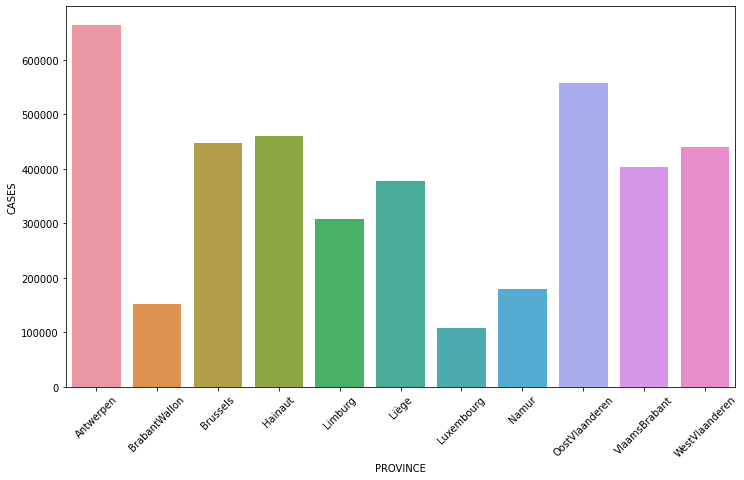

In [31]:
plt.figure(figsize=(12,7))
plt.xticks(rotation=45)
sns.barplot(data=cases_per_province, x='PROVINCE',y='CASES')
# displaying province wise data as graphical representation.

## Observation - 
1. Antwerpen has heighest number of cases followed by oostvlaanderen

In [32]:
age_wise_data = pd.DataFrame(df_age_sex.groupby(['PROVINCE','AGEGROUP','SEX'], as_index=False)['CASES'].sum())
# grouping by multiple columns to get corelation between columns.

In [33]:
age_wise_data

,PROVINCE,AGEGROUP,SEX,CASES
0,Antwerpen,0-9,F,27934
1,Antwerpen,0-9,M,29600
2,Antwerpen,10-19,F,52136
3,Antwerpen,10-19,M,52069
4,Antwerpen,20-29,F,54607
...,...,...,...,...
215,WestVlaanderen,70-79,M,12121
216,WestVlaanderen,80-89,F,12760
217,WestVlaanderen,80-89,M,8525
218,WestVlaanderen,90+,F,5814


<AxesSubplot:xlabel='PROVINCE', ylabel='CASES'>

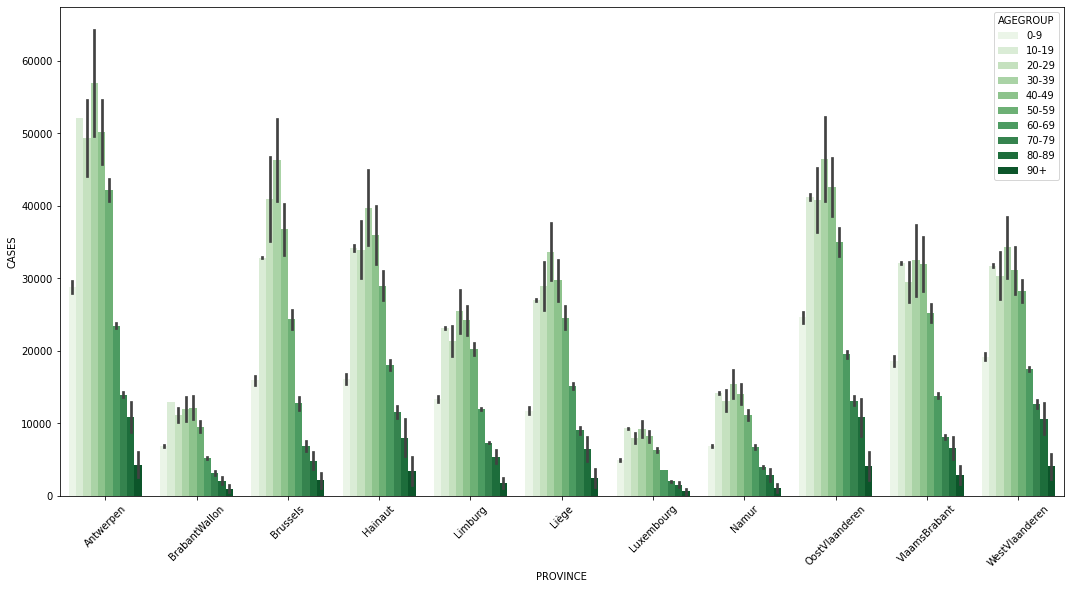

In [34]:
plt.figure(figsize=(18,9))
plt.xticks(rotation=45)
sns.barplot(data=age_wise_data, x='PROVINCE',y='CASES',hue='AGEGROUP',palette='Greens')

## Observation -
1. Data shows heighest cases were people from age group 30-39 followed by 40-49 and 20-29 age group.
2. Most cases were from reported from Antwerpen.

<AxesSubplot:xlabel='PROVINCE', ylabel='CASES'>

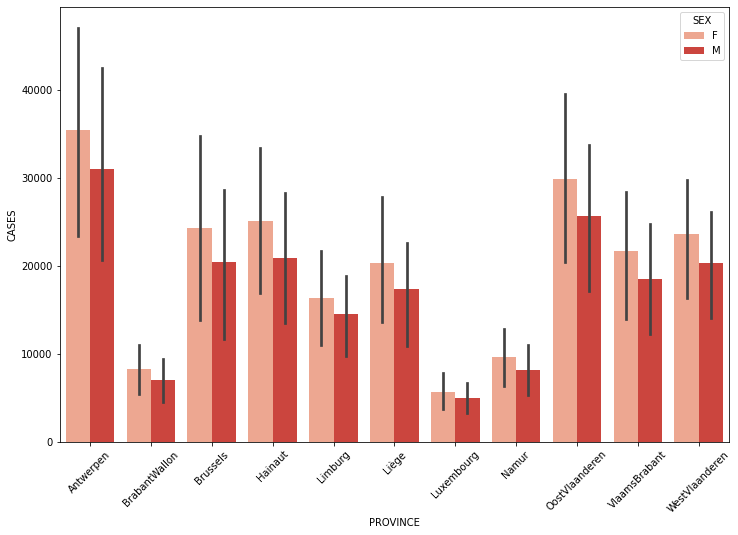

In [35]:
plt.figure(figsize=(12,8))
plt.xticks(rotation=45)
sns.barplot(data=age_wise_data, x='PROVINCE',y='CASES',hue='SEX', palette='Reds')

## Observation - 
1. Female cases are greater than men in all provinces.

## Hospital data
This data contains number of total patients and on which kind of support system they are on , province wise data as well as region level.

In [36]:
# reading the data with appropriate encoding.
df_hosp = pd.read_csv('../input/covid19-belgium/HOSP.csv', encoding='ISO-8859-1')
df_hosp

,DATE,PROVINCE,REGION,NR_REPORTING,TOTAL_IN,TOTAL_IN_ICU,TOTAL_IN_RESP,TOTAL_IN_ECMO,NEW_IN,NEW_OUT,WARD
0,15-03-2020,Antwerpen,Flanders,14,50,9,4,0,7,4,33
1,15-03-2020,BrabantWallon,Wallonia,2,5,2,2,0,1,0,1
2,15-03-2020,Brussels,Brussels,15,58,11,8,0,7,2,37
3,15-03-2020,Hainaut,Wallonia,14,54,12,10,1,26,1,30
4,15-03-2020,Limburg,Flanders,7,20,6,3,0,9,3,8
...,...,...,...,...,...,...,...,...,...,...,...
8982,09-06-2022,Luxembourg,Wallonia,3,19,3,1,0,0,0,15
8983,09-06-2022,Namur,Wallonia,6,30,0,0,0,1,1,29
8984,09-06-2022,OostVlaanderen,Flanders,13,146,6,2,0,14,16,122
8985,09-06-2022,VlaamsBrabant,Flanders,6,84,7,4,0,2,10,63


In [37]:
df_hosp.duplicated().sum()  # checking for duplicated data

0

In [38]:
df_hosp.isnull().sum() # checking for null values

DATE             0
PROVINCE         0
REGION           0
NR_REPORTING     0
TOTAL_IN         0
TOTAL_IN_ICU     0
TOTAL_IN_RESP    0
TOTAL_IN_ECMO    0
NEW_IN           0
NEW_OUT          0
WARD             0
dtype: int64

In [39]:
# grouping by province with adding all required numerical column
hosp_province = df_hosp.groupby(['PROVINCE'])[['TOTAL_IN','TOTAL_IN_ICU','TOTAL_IN_RESP','TOTAL_IN_ECMO','NEW_OUT','WARD']].sum()
hosp_province

,TOTAL_IN,TOTAL_IN_ICU,TOTAL_IN_RESP,TOTAL_IN_ECMO,NEW_OUT,WARD
PROVINCE,,,,,,
Antwerpen,241979,47860,27303,2492,22254,142070
BrabantWallon,21562,3967,2578,55,2346,12616
Brussels,254648,56158,35646,6937,22305,133602
Hainaut,240472,44864,29623,4119,18959,142907
Limburg,99154,20126,10637,1147,9648,57596
Liège,181659,35783,21601,1099,15077,108099
Luxembourg,31489,6780,3749,99,2116,18745
Namur,64801,15651,9495,1332,5005,33318
OostVlaanderen,207501,41163,19655,2110,20433,124140


In [40]:
hosp_province.columns

Index(['TOTAL_IN', 'TOTAL_IN_ICU', 'TOTAL_IN_RESP', 'TOTAL_IN_ECMO', 'NEW_OUT',
       'WARD'],
      dtype='object')

<AxesSubplot:xlabel='PROVINCE'>

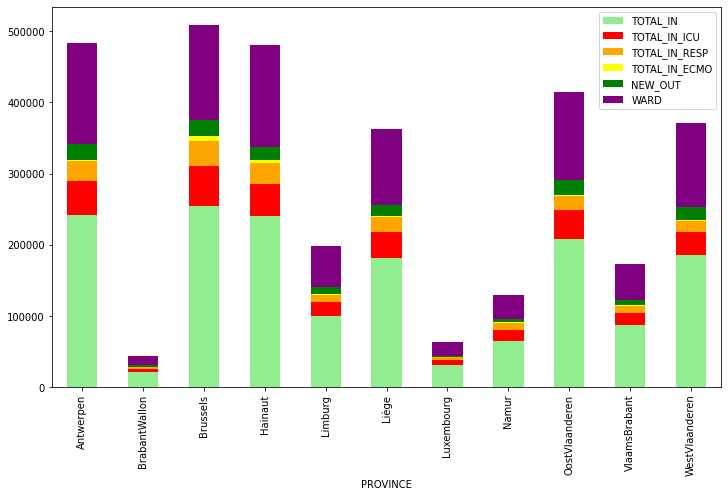

In [41]:
hosp_province.plot(kind='bar', stacked=True, color=['lightgreen', 'red', 'orange','yellow','green','purple'],figsize=(12,7))

## Observation-
1. Brussels have most no. of patients in ICU.
2. Majority of patiens are in ward shows the have only mildly cold or very few symtoms.
3. Recoverd and discharched patients are way less compare to incoming patients.

In [42]:
# Grouping the data region wise
hosp_region = df_hosp.groupby(['REGION'])[['TOTAL_IN','TOTAL_IN_ICU','TOTAL_IN_RESP','TOTAL_IN_ECMO','NEW_OUT','WARD']].sum()
hosp_region

,TOTAL_IN,TOTAL_IN_ICU,TOTAL_IN_RESP,TOTAL_IN_ECMO,NEW_OUT,WARD
REGION,,,,,,
Brussels,254648,56158,35646,6937,22305,133602
Flanders,820958,158667,83571,8211,76863,493646
Wallonia,539983,107045,67046,6704,43503,315685


<AxesSubplot:xlabel='REGION'>

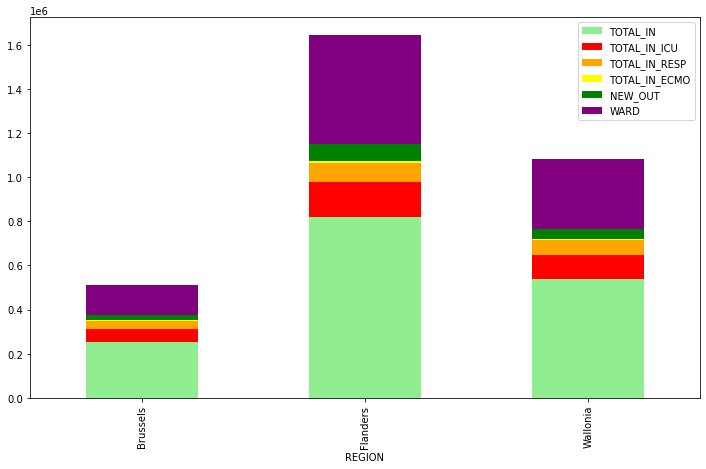

In [43]:
hosp_region.plot(kind='bar', stacked=True, color=['lightgreen', 'red', 'orange','yellow','green','purple'],figsize=(12,7))

## Observations-
1. For every sector Flanders region is struggling with heighest number of cases.

## Mortuary data

In [44]:
# reading the data with appropriate encoding.
df_mort = pd.read_csv('../input/covid19-belgium/MORT.csv', encoding='ISO-8859-1' ,parse_dates=True)
df_mort

,DATE,REGION,AGEGROUP,SEX,DEATHS
0,2020-03-07,Brussels,75-84,M,1
1,2020-03-10,Brussels,85+,F,1
2,2020-03-11,Flanders,85+,M,1
3,2020-03-11,Brussels,65-74,M,1
4,2020-03-11,Brussels,85+,F,1
...,...,...,...,...,...
9544,2022-06-08,Wallonia,75-84,M,1
9545,2022-06-08,Wallonia,85+,F,1
9546,2022-06-08,Flanders,75-84,M,1
9547,2022-06-08,Flanders,85+,M,1


In [45]:
df_mort.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9549 entries, 0 to 9548
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   DATE      9549 non-null   object
 1   REGION    9549 non-null   object
 2   AGEGROUP  9522 non-null   object
 3   SEX       9529 non-null   object
 4   DEATHS    9549 non-null   int64 
dtypes: int64(1), object(4)
memory usage: 373.1+ KB


In [46]:
df_mort['DATE'] = pd.to_datetime(df_mort['DATE'])
df_mort.info() #correcting the datatype

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9549 entries, 0 to 9548
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   DATE      9549 non-null   datetime64[ns]
 1   REGION    9549 non-null   object        
 2   AGEGROUP  9522 non-null   object        
 3   SEX       9529 non-null   object        
 4   DEATHS    9549 non-null   int64         
dtypes: datetime64[ns](1), int64(1), object(3)
memory usage: 373.1+ KB


In [47]:
df_mort.duplicated().sum() #checking for duplicated value

0

In [48]:
df_mort.isnull().sum() #checking for null value.

DATE         0
REGION       0
AGEGROUP    27
SEX         20
DEATHS       0
dtype: int64

In [49]:
df_mort['AGEGROUP'].value_counts() # deaths according to agegroup

85+      2983
75-84    2708
65-74    2127
45-64    1498
25-44     190
0-24       16
Name: AGEGROUP, dtype: int64

In [50]:
# filling the data with mode 
df_mort['AGEGROUP'] = df_mort['AGEGROUP'].fillna(df_mort['AGEGROUP'].mode()[0])

In [51]:
df_mort.isnull().sum() #checking its null value

DATE         0
REGION       0
AGEGROUP     0
SEX         20
DEATHS       0
dtype: int64

In [52]:
df_mort['SEX'].value_counts() # deaths according to gender.

M    5157
F    4372
Name: SEX, dtype: int64

In [53]:
df_mort['SEX'].mode()[0] #finding mode

'M'

In [54]:
# filling the data with mode 
df_mort['SEX'] = df_mort['SEX'].fillna(df_mort['SEX'].mode()[0])

In [55]:
df_mort.isnull().sum()

DATE        0
REGION      0
AGEGROUP    0
SEX         0
DEATHS      0
dtype: int64

In [56]:
#grouping the data based on region and gender.
mort_data = df_mort.groupby(['REGION','SEX'],as_index=False)['DEATHS'].sum()


In [57]:
mort_data

,REGION,SEX,DEATHS
0,Brussels,F,1934
1,Brussels,M,2249
2,Flanders,F,7691
3,Flanders,M,8552
4,Wallonia,F,5600
5,Wallonia,M,5790


<AxesSubplot:xlabel='REGION', ylabel='DEATHS'>

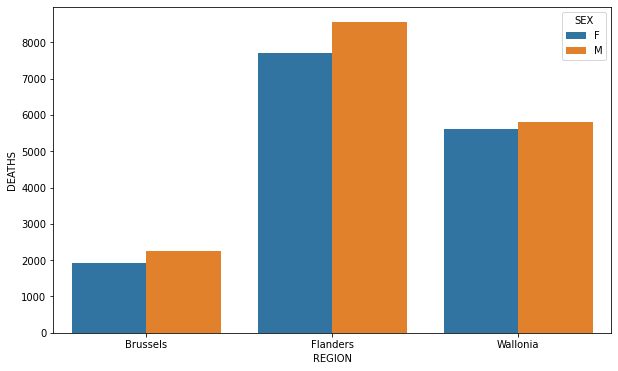

In [58]:
plt.figure(figsize=(10,6))
sns.barplot(data=mort_data, x='REGION',y='DEATHS',hue='SEX')

## Observation -
1. Flanders have the heighest death rate.
2. Males in all region has heigher death rate even cases are more in females but death rate is less than male.

In [59]:
# grouping the data region,gender and agegroup wise.
mort_data1 = df_mort.groupby(['REGION','SEX','AGEGROUP'],as_index=False)['DEATHS'].sum()
mort_data1

,REGION,SEX,AGEGROUP,DEATHS
0,Brussels,F,0-24,4
1,Brussels,F,25-44,30
2,Brussels,F,45-64,159
3,Brussels,F,65-74,234
4,Brussels,F,75-84,526
5,Brussels,F,85+,981
6,Brussels,M,0-24,4
7,Brussels,M,25-44,36
8,Brussels,M,45-64,332
9,Brussels,M,65-74,420


<AxesSubplot:xlabel='AGEGROUP', ylabel='DEATHS'>

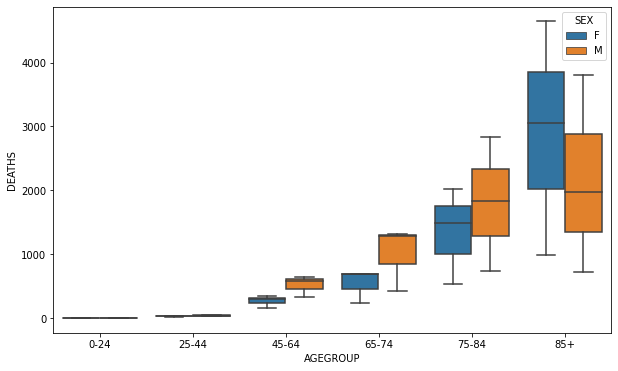

In [60]:
plt.figure(figsize=(10,6))
sns.boxplot(data=mort_data1, x='AGEGROUP',y='DEATHS',hue='SEX')

## Observation
1. older person have higher death rate as compare to young ones.
2. 85+ has the heighest death rate and is only agegroup to have female death rate heigher than men.

<AxesSubplot:xlabel='REGION', ylabel='DEATHS'>

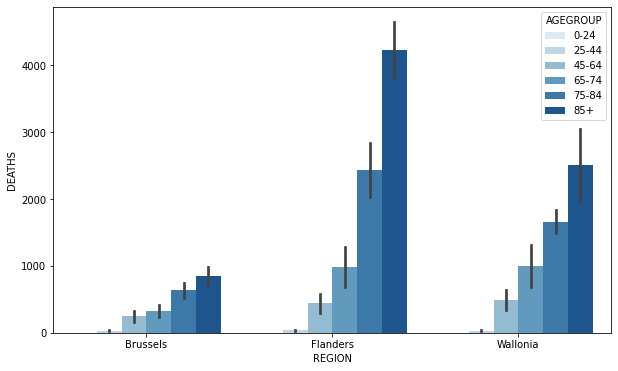

In [61]:
plt.figure(figsize=(10,6))
sns.barplot(data=mort_data1, x='REGION',y='DEATHS',hue='AGEGROUP',palette='Blues')

In [62]:
## same data shown in barplot.

## Test data

In [63]:
# reading the data with appropriate encoding.
df_tests = pd.read_csv('../input/covid19-belgium/TESTS.csv', encoding='ISO-8859-1' ,parse_dates=True)
df_tests

,DATE,PROVINCE,REGION,TESTS_ALL,TESTS_ALL_POS
0,2020-03-01,Antwerpen,Flanders,18,0
1,2020-03-01,BrabantWallon,Wallonia,8,0
2,2020-03-01,Brussels,Brussels,4,0
3,2020-03-01,Hainaut,Wallonia,5,0
4,2020-03-01,Limburg,Flanders,7,0
...,...,...,...,...,...
9967,2022-06-09,Namur,Wallonia,3,0
9968,2022-06-09,OostVlaanderen,Flanders,24,5
9969,2022-06-09,VlaamsBrabant,Flanders,21,2
9970,2022-06-09,WestVlaanderen,Flanders,17,1


In [64]:
df_tests.info() #checking its data type

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9972 entries, 0 to 9971
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   DATE           9972 non-null   object
 1   PROVINCE       9141 non-null   object
 2   REGION         9141 non-null   object
 3   TESTS_ALL      9972 non-null   int64 
 4   TESTS_ALL_POS  9972 non-null   int64 
dtypes: int64(2), object(3)
memory usage: 389.7+ KB


In [65]:
df_tests['DATE'] = pd.to_datetime(df_tests['DATE'])
df_tests.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9972 entries, 0 to 9971
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   DATE           9972 non-null   datetime64[ns]
 1   PROVINCE       9141 non-null   object        
 2   REGION         9141 non-null   object        
 3   TESTS_ALL      9972 non-null   int64         
 4   TESTS_ALL_POS  9972 non-null   int64         
dtypes: datetime64[ns](1), int64(2), object(2)
memory usage: 389.7+ KB


In [66]:
df_tests.duplicated().sum() #checking duplicate value

0

In [67]:
df_tests.isnull().sum() #checking null value

DATE               0
PROVINCE         831
REGION           831
TESTS_ALL          0
TESTS_ALL_POS      0
dtype: int64

In [68]:
df_tests['PROVINCE'].value_counts()

Antwerpen         831
BrabantWallon     831
Brussels          831
Hainaut           831
Limburg           831
Liège             831
Luxembourg        831
Namur             831
OostVlaanderen    831
VlaamsBrabant     831
WestVlaanderen    831
Name: PROVINCE, dtype: int64

In [69]:
df_tests['REGION'].value_counts()

Flanders    4155
Wallonia    4155
Brussels     831
Name: REGION, dtype: int64

In [70]:
df_tests.shape

(9972, 5)

In [71]:
df_tests = df_tests.dropna()
df_tests.isnull().sum()

DATE             0
PROVINCE         0
REGION           0
TESTS_ALL        0
TESTS_ALL_POS    0
dtype: int64

In [72]:
df_tests.shape

(9141, 5)

In [73]:
#grouping data according to region
region_tests = df_tests.groupby(['REGION'], as_index=False)[['TESTS_ALL','TESTS_ALL_POS']].sum()
region_tests

,REGION,TESTS_ALL,TESTS_ALL_POS
0,Brussels,4060429,505954
1,Flanders,20129421,2607353
2,Wallonia,9152833,1390888


In [74]:
region_tests_region = region_tests['REGION']

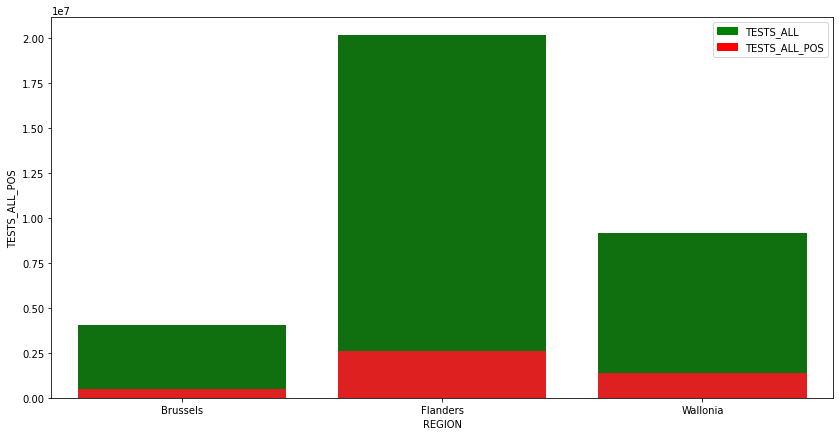

In [75]:
plt.figure(figsize=(14,7))

region_tests = df_tests.groupby(['REGION'])['TESTS_ALL'].sum().reset_index()

c1 = sns.barplot(data=region_tests, x='REGION',y='TESTS_ALL',color='green')

s = df_tests.groupby(['REGION'])['TESTS_ALL_POS'].sum().reset_index()

c2 = sns.barplot(data=s, x='REGION',y='TESTS_ALL_POS',color='red', estimator=np.sum)

colors = {'TESTS_ALL':'green', 'TESTS_ALL_POS':'red'}         
labels = list(colors.keys())
handles = [plt.Rectangle((0,0),1,1, color=colors[label]) for label in labels]
plt.legend(handles, labels)


## Observation-
1. Flanders have heighest test rate as well as heighest number of covid positive pateints.
2. Wallonia has heighest ratio of positive pateints.

In [76]:
#grouping province wise data.
province_tests = df_tests.groupby(['PROVINCE'], as_index=False)[['TESTS_ALL','TESTS_ALL_POS']].sum()
province_tests

,PROVINCE,TESTS_ALL,TESTS_ALL_POS
0,Antwerpen,5490751,715073
1,BrabantWallon,1216088,166255
2,Brussels,4060429,505954
3,Hainaut,3298814,502998
4,Limburg,2457896,340339
5,Liège,2652383,416255
6,Luxembourg,761140,114792
7,Namur,1224408,190588
8,OostVlaanderen,4723984,611150
9,VlaamsBrabant,3561106,443415


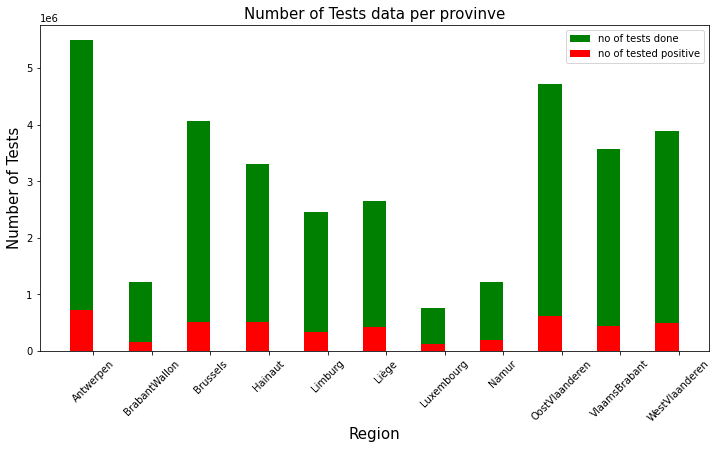

In [77]:
xaxis_region = province_tests['PROVINCE']
y_no_of_tests = province_tests['TESTS_ALL']
z_no_of_tests_positive = province_tests['TESTS_ALL_POS']
x_axis = np.arange(len(xaxis_region))
# Multi bar Chart
plt.subplots(figsize=(12,6)) 
plt.bar(x_axis - 0.2, y_no_of_tests,label = 'no of tests done',width=0.4,color='green')
plt.bar(x_axis - 0.2, z_no_of_tests_positive,label = 'no of tested positive',width=0.4,color='red')
plt.xticks(x_axis,xaxis_region,rotation=45)
plt.xlabel("Region",fontsize=15)
plt.ylabel("Number of Tests",fontsize=15)
plt.title("Number of Tests data per provinve",fontsize=15)

# Add legend
plt.legend()

# Display
plt.show()

## Observation-
1. Antwerpen have heighest test rate as well as heighest number of covid positive pateints followed by oostvlaaderen.

## Vaccine data

In [78]:
df_vacc = pd.read_csv('../input/covid19-belgium/VACC.csv')
df_vacc

,DATE,REGION,AGEGROUP,SEX,BRAND,DOSE,COUNT
0,2020-12-28,Brussels,25-34,F,Pfizer-BioNTech,A,1
1,2020-12-28,Brussels,25-34,M,Pfizer-BioNTech,A,2
2,2020-12-28,Brussels,35-44,M,Pfizer-BioNTech,A,2
3,2020-12-28,Brussels,45-54,F,Pfizer-BioNTech,A,2
4,2020-12-28,Brussels,45-54,M,Pfizer-BioNTech,A,1
...,...,...,...,...,...,...,...
188118,2022-06-07,Wallonia,65-74,M,Pfizer-BioNTech,E2,3
188119,2022-06-07,Wallonia,75-84,F,Pfizer-BioNTech,E,1
188120,2022-06-07,Wallonia,75-84,F,Pfizer-BioNTech,E2,2
188121,2022-06-07,Wallonia,75-84,M,Pfizer-BioNTech,E2,4


In [79]:
df_vacc.info() #checking its datatype.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 188123 entries, 0 to 188122
Data columns (total 7 columns):
 #   Column    Non-Null Count   Dtype 
---  ------    --------------   ----- 
 0   DATE      188123 non-null  object
 1   REGION    157327 non-null  object
 2   AGEGROUP  188123 non-null  object
 3   SEX       186866 non-null  object
 4   BRAND     188123 non-null  object
 5   DOSE      188123 non-null  object
 6   COUNT     188123 non-null  int64 
dtypes: int64(1), object(6)
memory usage: 10.0+ MB


In [80]:
df_vacc['DATE'] = pd.to_datetime(df_vacc['DATE'])
df_vacc.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 188123 entries, 0 to 188122
Data columns (total 7 columns):
 #   Column    Non-Null Count   Dtype         
---  ------    --------------   -----         
 0   DATE      188123 non-null  datetime64[ns]
 1   REGION    157327 non-null  object        
 2   AGEGROUP  188123 non-null  object        
 3   SEX       186866 non-null  object        
 4   BRAND     188123 non-null  object        
 5   DOSE      188123 non-null  object        
 6   COUNT     188123 non-null  int64         
dtypes: datetime64[ns](1), int64(1), object(5)
memory usage: 10.0+ MB


In [81]:
df_vacc['BRAND'].value_counts() #types of vaccine and its counts

Pfizer-BioNTech       100886
Moderna                45572
AstraZeneca-Oxford     18326
Johnson&Johnson        15465
Other                   6590
Novavax                 1284
Name: BRAND, dtype: int64

In [82]:
df_vacc['DOSE'].value_counts() #types of dose and its counts

A     68661
B     65735
E     30992
C     15139
E2     7596
Name: DOSE, dtype: int64

In [83]:
df_vacc.duplicated().sum()

0

In [84]:
null_value = df_vacc.isnull().sum() #finding null values
null_value

DATE            0
REGION      30796
AGEGROUP        0
SEX          1257
BRAND           0
DOSE            0
COUNT           0
dtype: int64

In [85]:
null_value['REGION']

30796

In [86]:
df_vacc.shape

(188123, 7)

In [87]:
df_vacc['REGION'].shape

(188123,)

In [88]:
region_values = df_vacc['REGION'].value_counts()
region_values

Flanders      52773
Brussels      48106
Wallonia      41537
Ostbelgien    14911
Name: REGION, dtype: int64

In [89]:
# creating list of ratio so we can fill null values according to region and its present values.
lst_of_num = []
for i in region_values.values:
    lst_of_num.append(round(i/(len(df_vacc)-(null_value['REGION'])),2))


In [90]:
lst_of_num

[0.34, 0.31, 0.26, 0.09]

In [91]:
14911/188123

0.07926197222030268

In [92]:
30796/188123

0.16370140812128237

In [93]:
# filling the data accordingly to the null values in there region.
df_vacc['REGION'] = df_vacc['REGION'].fillna(pd.Series(np.random.choice(['Flanders', 'Brussels', 'Wallonia','Ostbelgien'], p=lst_of_num, size=len(df_vacc))))

In [94]:
df_vacc.isnull().sum()

DATE           0
REGION         0
AGEGROUP       0
SEX         1257
BRAND          0
DOSE           0
COUNT          0
dtype: int64

In [95]:
vacc_values = df_vacc['SEX'].value_counts()
vacc_values

F    93509
M    93357
Name: SEX, dtype: int64

In [96]:
# same with sex column
lst_of_sex = []
for i in vacc_values.values:
    lst_of_sex.append(round(i/(len(df_vacc)-(null_value['SEX'])),5))

In [97]:
lst_of_sex

[0.50041, 0.49959]

In [98]:
df_vacc['SEX'] = df_vacc['SEX'].fillna(pd.Series(np.random.choice(['F', 'M'], p=lst_of_sex, size=len(df_vacc))))

In [99]:
df_vacc.isnull().sum()

DATE        0
REGION      0
AGEGROUP    0
SEX         0
BRAND       0
DOSE        0
COUNT       0
dtype: int64

In [100]:
#grouping by region, agegroup, sex, brand, dose.
vaccine = df_vacc.groupby(['REGION','AGEGROUP','SEX','BRAND','DOSE'], as_index=False)['COUNT'].sum()
vaccine

,REGION,AGEGROUP,SEX,BRAND,DOSE,COUNT
0,Brussels,00-04,F,Moderna,A,1
1,Brussels,00-04,F,Moderna,B,1
2,Brussels,00-04,F,Other,A,1
3,Brussels,00-04,F,Other,B,1
4,Brussels,00-04,F,Pfizer-BioNTech,A,434
...,...,...,...,...,...,...
1331,Wallonia,85+,M,Novavax,E,2
1332,Wallonia,85+,M,Pfizer-BioNTech,A,14967
1333,Wallonia,85+,M,Pfizer-BioNTech,B,14605
1334,Wallonia,85+,M,Pfizer-BioNTech,E,21316


<AxesSubplot:xlabel='BRAND', ylabel='COUNT'>

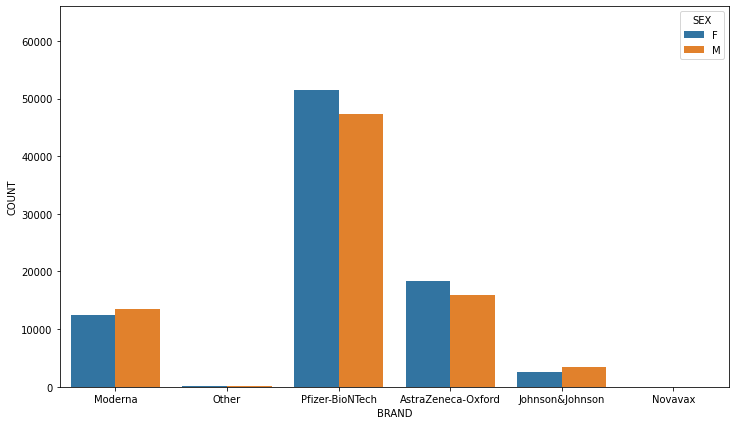

In [101]:
plt.figure(figsize=(12,7))
sns.barplot(data=vaccine, x = 'BRAND',y='COUNT',hue='SEX',errwidth=0)

## Observation
1. Pfizer is mosty used among all vaccines.
2. moderna is only vaccine which is provided to male more.

<AxesSubplot:xlabel='AGEGROUP', ylabel='COUNT'>

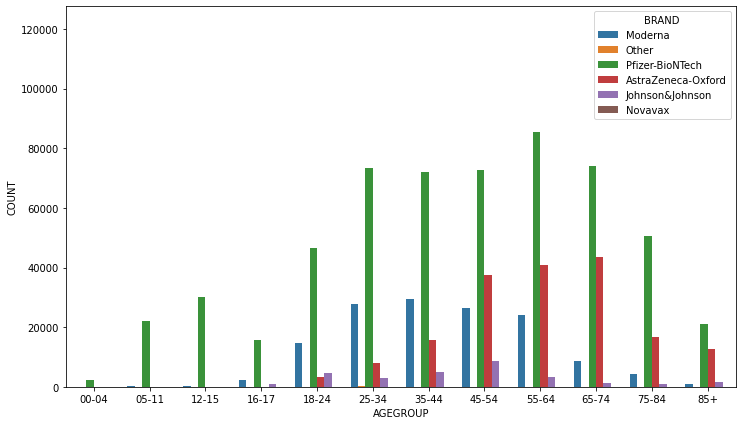

In [102]:
plt.figure(figsize=(12,7))
sns.barplot(data=vaccine, x = 'AGEGROUP',y='COUNT',hue='BRAND',errwidth=0)

## Observation-
1. Pfizer is provided to majority of all age group followed by astrazeneca.

<AxesSubplot:xlabel='DOSE', ylabel='COUNT'>

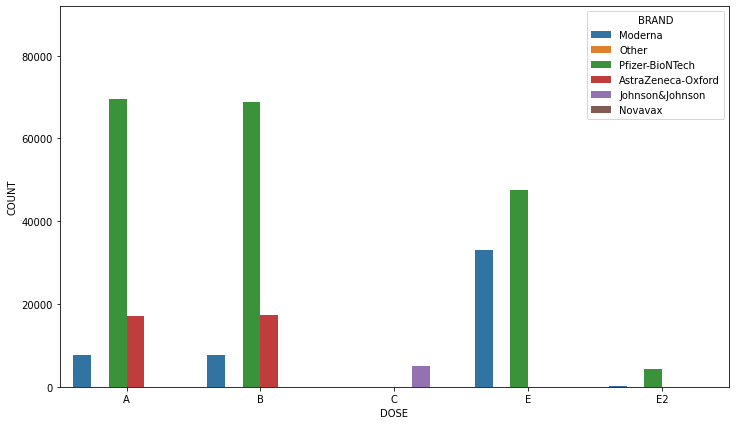

In [103]:
plt.figure(figsize=(12,7))
sns.barplot(data=vaccine, x = 'DOSE',y='COUNT',hue='BRAND',errwidth=0)

In [104]:
## Pfizer vaccine doses are most amoung all vaccines. 

<AxesSubplot:xlabel='BRAND', ylabel='COUNT'>

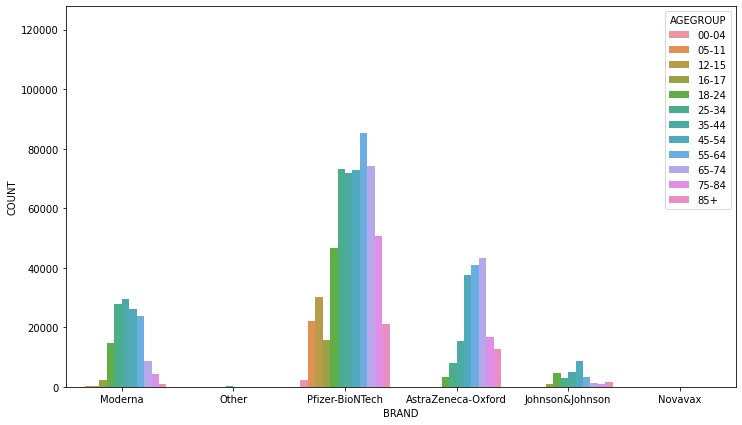

In [105]:
plt.figure(figsize=(12,7))
sns.barplot(data=vaccine, x = 'BRAND',y='COUNT',hue='AGEGROUP',errwidth=0)

In [106]:
## same data shown age group wise with respect to all the available vaccines.

<AxesSubplot:xlabel='AGEGROUP', ylabel='COUNT'>

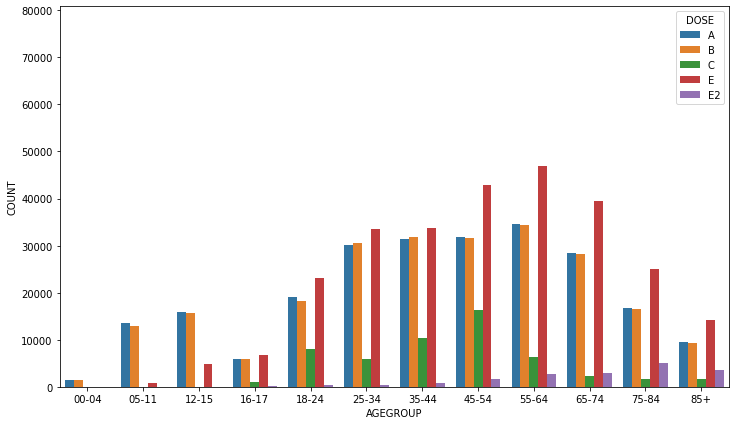

In [107]:
plt.figure(figsize=(12,7))
sns.barplot(data=vaccine, x = 'AGEGROUP',y='COUNT',hue='DOSE',errwidth=0)

## Observations-
1. Age group 55-64 got heighest number of doses.
2. E which means required extra booster dose after previous doses.

## Nursing home data

In [108]:
# reading the data .
df_nh = pd.read_csv('../input/covid19-belgium/NH.csv')
df_nh

,YEAR_WEEK,REGION,PART_RATE_PERCENT,CASES_PER_100,NEW_IN_PER_100,DEATHS_PER_100
0,20W10,Belgium,NaN,NaN,NaN,NaN
1,20W10,Brussels,NaN,NaN,NaN,NaN
2,20W10,Flanders,NaN,NaN,NaN,NaN
3,20W10,German speaking community,NaN,NaN,NaN,NaN
4,20W10,Wallonia,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...
585,22W22,Belgium,63.0,0.16,0.01,0.01
586,22W22,Brussels,45.0,0.21,0.03,0.00
587,22W22,Flanders,65.0,0.21,0.01,0.01
588,22W22,German speaking community,22.0,0.00,0.00,0.00


In [109]:
df_nh.info() #checking its datatype.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 590 entries, 0 to 589
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   YEAR_WEEK          590 non-null    object 
 1   REGION             590 non-null    object 
 2   PART_RATE_PERCENT  540 non-null    float64
 3   CASES_PER_100      540 non-null    float64
 4   NEW_IN_PER_100     540 non-null    float64
 5   DEATHS_PER_100     585 non-null    float64
dtypes: float64(4), object(2)
memory usage: 27.8+ KB


In [110]:
df_nh.duplicated().sum()

0

In [111]:
df_nh.isnull().sum() #null values

YEAR_WEEK             0
REGION                0
PART_RATE_PERCENT    50
CASES_PER_100        50
NEW_IN_PER_100       50
DEATHS_PER_100        5
dtype: int64

<AxesSubplot:xlabel='PART_RATE_PERCENT', ylabel='Count'>

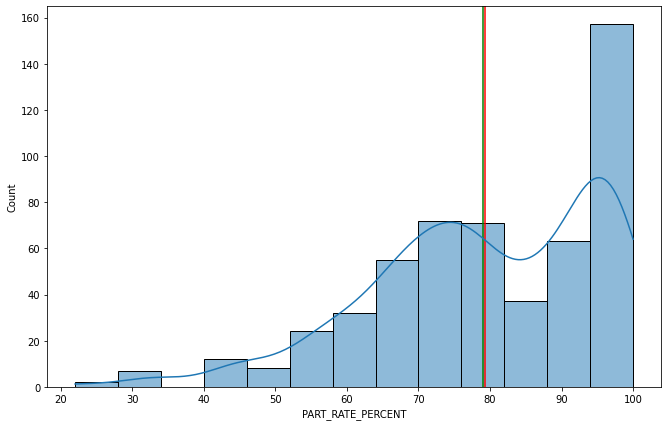

In [112]:
#  Number of nursing homes that participated at least once in the
#  corresponding week, expressed in a percentage.

plt.figure(figsize=(11,7))
plt.axvline(df_nh['PART_RATE_PERCENT'].mean(), color = 'red', label='mean') 
plt.axvline(df_nh['PART_RATE_PERCENT'].median(), color = 'green',label='median') 
sns.histplot(data=df_nh,x='PART_RATE_PERCENT',kde=True)

#### checking its data distribution we can replace null value with median as well as mean.

In [113]:
df_nh['PART_RATE_PERCENT'].median()

79.0

In [114]:

df_nh['PART_RATE_PERCENT'].fillna(int(df_nh['PART_RATE_PERCENT'].median()),inplace=True)

In [115]:
df_nh.isnull().sum()

YEAR_WEEK             0
REGION                0
PART_RATE_PERCENT     0
CASES_PER_100        50
NEW_IN_PER_100       50
DEATHS_PER_100        5
dtype: int64

<AxesSubplot:xlabel='CASES_PER_100', ylabel='Count'>

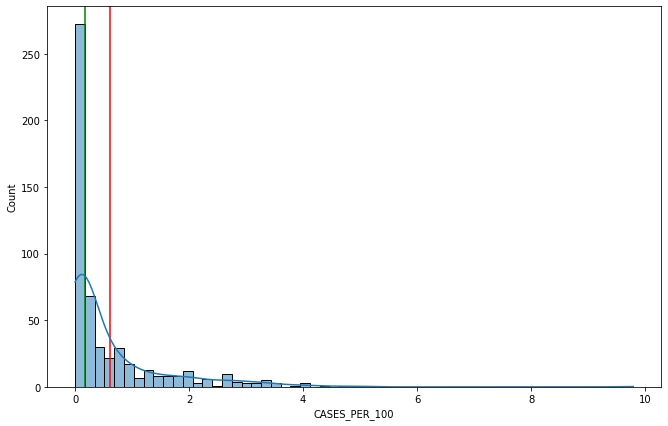

In [116]:
plt.figure(figsize=(11,7))
plt.axvline(df_nh['CASES_PER_100'].mean(), color = 'red', label='mean') 
plt.axvline(df_nh['CASES_PER_100'].median(), color = 'green',label='median') 
sns.histplot(data=df_nh,x='CASES_PER_100',kde=True)

#### Data is skewed towards right so replacing null values with median as median as median remains uneffected with extreme values.

In [117]:
round(df_nh['CASES_PER_100'].mean(),2)

0.61

In [118]:
round(df_nh['CASES_PER_100'].median(),2)

0.16

In [119]:
df_nh['CASES_PER_100'].fillna(int(df_nh['CASES_PER_100'].median()),inplace=True)

In [120]:
df_nh.isnull().sum()

YEAR_WEEK             0
REGION                0
PART_RATE_PERCENT     0
CASES_PER_100         0
NEW_IN_PER_100       50
DEATHS_PER_100        5
dtype: int64

<AxesSubplot:xlabel='NEW_IN_PER_100', ylabel='Count'>

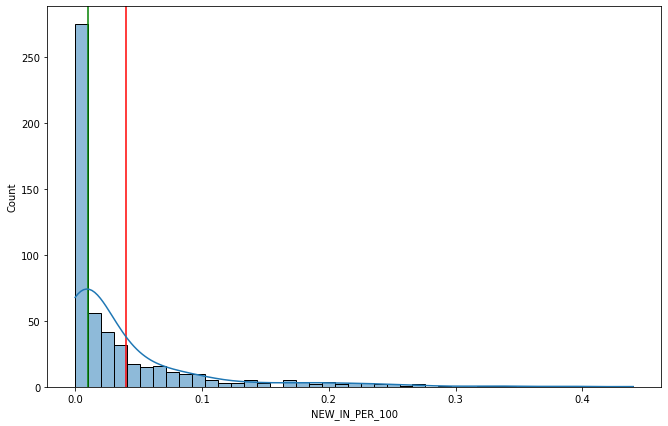

In [121]:
plt.figure(figsize=(11,7))
plt.axvline(df_nh['NEW_IN_PER_100'].mean(), color = 'red', label='mean') 
plt.axvline(df_nh['NEW_IN_PER_100'].median(), color = 'green',label='median') 
sns.histplot(data=df_nh,x='NEW_IN_PER_100',kde=True)

#### Data is skewed towards right so replacing null values with median as median as median remains uneffected with extreme values.

In [122]:
round(df_nh['NEW_IN_PER_100'].median(),2)

0.01

In [123]:
round(df_nh['NEW_IN_PER_100'].mean(),2)

0.04

In [124]:
df_nh['NEW_IN_PER_100'].fillna(int(df_nh['NEW_IN_PER_100'].median()),inplace=True)

In [125]:
df_nh.isnull().sum()

YEAR_WEEK            0
REGION               0
PART_RATE_PERCENT    0
CASES_PER_100        0
NEW_IN_PER_100       0
DEATHS_PER_100       5
dtype: int64

<AxesSubplot:xlabel='DEATHS_PER_100', ylabel='Count'>

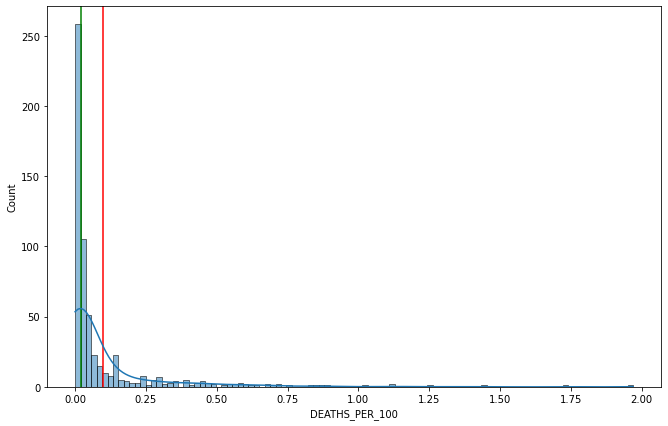

In [126]:
plt.figure(figsize=(11,7))
plt.axvline(df_nh['DEATHS_PER_100'].mean(), color = 'red', label='mean') 
plt.axvline(df_nh['DEATHS_PER_100'].median(), color = 'green',label='median') 
sns.histplot(data=df_nh,x='DEATHS_PER_100',kde=True)

#### Data is skewed towards right so replacing null values with median as median as median remains uneffected with extreme values.

In [127]:
df_nh['DEATHS_PER_100'].fillna(int(df_nh['DEATHS_PER_100'].median()),inplace=True)

In [128]:
df_nh.isnull().sum()

YEAR_WEEK            0
REGION               0
PART_RATE_PERCENT    0
CASES_PER_100        0
NEW_IN_PER_100       0
DEATHS_PER_100       0
dtype: int64

In [129]:
# Grouping the data region wise
df_nh_region = df_nh.groupby(['REGION'], as_index=False)[['PART_RATE_PERCENT','CASES_PER_100','NEW_IN_PER_100','DEATHS_PER_100']].mean()
df_nh_region

,REGION,PART_RATE_PERCENT,CASES_PER_100,NEW_IN_PER_100,DEATHS_PER_100
0,Belgium,82.889831,0.606102,0.037966,0.093983
1,Brussels,72.228814,0.481441,0.036441,0.125508
2,Flanders,85.822034,0.614746,0.029153,0.092458
3,German speaking community,73.966102,0.477458,0.024831,0.087966
4,Wallonia,81.533898,0.614407,0.055000,0.087203


<AxesSubplot:xlabel='CASES_PER_100', ylabel='DEATHS_PER_100'>

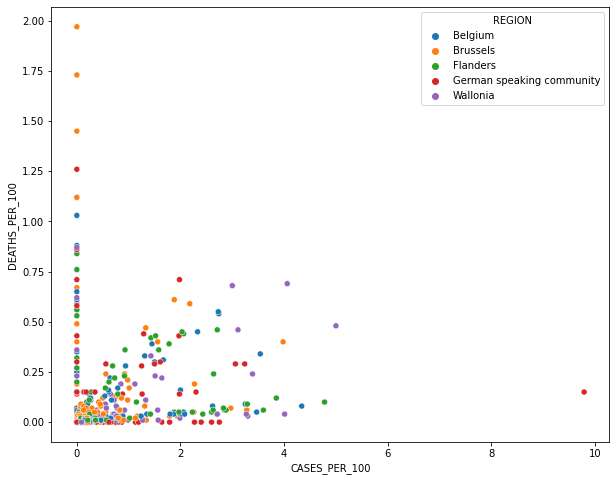

In [130]:
# using scatter plot to find corelation between 2 numerical values
plt.figure(figsize=(10,8))
sns.scatterplot(data=df_nh, x = 'CASES_PER_100',y ='DEATHS_PER_100',hue='REGION')

## Observation-
1. Brussels have heighest number of deaths per 100.
2. german speaking community, Wallonia has heighest number of cases per 100. 